# CÂU 6

Viết đoạn code mẫu bằng Python (sử dụng Scikit-learn) để xây dựng một mô hình cây quyết định không? Hãy mô tả các bước thực hiện 

### 1. Import thư viện 

In [65]:
!sudo apt-get update
!sudo apt-get install -y graphviz
!pip install graphviz


Hit:1 https://dl.yarnpkg.com/debian stable InRelease
0% [Connected to packages.microsoft.com (13.107.226.59)]

Hit:2 https://packages.microsoft.com/repos/microsoft-ubuntu-noble-prod noble InRelease
Hit:3 https://repo.anaconda.com/pkgs/misc/debrepo/conda stable InRelease       
Hit:4 http://archive.ubuntu.com/ubuntu noble InRelease                         
Hit:5 http://security.ubuntu.com/ubuntu noble-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu noble-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu noble-backports InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-9ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 76 not upgraded.

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [77]:
import numpy as np #numerical computation 
import pandas as pd #data wrangling 
import matplotlib.pyplot as plt #plotting package 
#Next line helps with rendering plots 
%matplotlib inline 
import matplotlib as mpl #add'l plotting functionality 
mpl.rcParams['figure.dpi'] = 400 #high res figures 
import graphviz #to visualize decision trees 


### 2. Nạp và phân tích dữ liệu

In [78]:
df = pd.read_csv('default_of_credit_card_clients.csv') #Load the cleaned data 
features_response = df.columns.tolist() #Get a list of column names 
#Make a list of columns to remove that aren't features or the response variable 
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3',
         'PAY_4', 'PAY_5', 'PAY_6', 
         'EDUCATION_CAT', 'graduate school',
         'high school', 'none',
         'others', 'university'] 
features_response = [item for item in features_response if item not in items_to_remove] 
features_response 


['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

### 3. Chuẩn bị dữ liệu cho tập train và tập test 

In [79]:
from sklearn.model_selection import train_test_split 
from sklearn import tree 
#Split the data into training and testing sets using the same random seed 
X_train, X_test, y_train, y_test = train_test_split(df[features_response[:-1]].values, 
       df['default payment next month'].values, 
       test_size=0.2, random_state=24) 

### 4. Xây dựng cây quyết định

In [75]:
# the tree will grow to a depth of at most 2 
dt = tree.DecisionTreeClassifier(max_depth=2) 
dt.fit(X_train, y_train) 


,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### 5. Hiển thị cây quyết định với package graphviz 

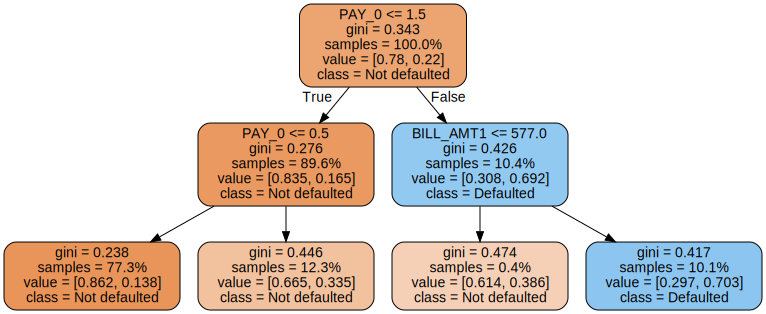

In [76]:
dot_data = tree.export_graphviz(dt, 
 out_file=None, 
 filled=True, 
 rounded=True, 
 feature_names=
    features_response[:-1], 
    proportion=True, 
    class_names=['Not defaulted', 'Defaulted']) 
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="png", cleanup=True)
graph = graphviz.Source(dot_data) 
graph

# CÂU 7

Làm thế nào để triển khai một mô hình Random Forest trong Python? Bạn thường thiết lập các tham số nào (ví dụ: n_estimators, max_depth)? 


### Thực hiện bước 1, 2 và 3 để tải thư viện, nạp dữ liệu và chuẩn bị dữ liệu 

### 4. Tạo rừng cây với lớp RandomForestClassifier trong Scikit-Learn 

In [80]:
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier (n_estimators=10, criterion='gini', max_depth=3, 
min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, 
bootstrap=True, oob_score=False, n_jobs=None, 
random_state=4, verbose=0, warm_start=False, class_weight=None) 

# CÂU 8

Làm thế nào để đánh giá tầm quan trọng của các đặc trưng (feature importance) trong Random Forest bằng Python? 

<Axes: >

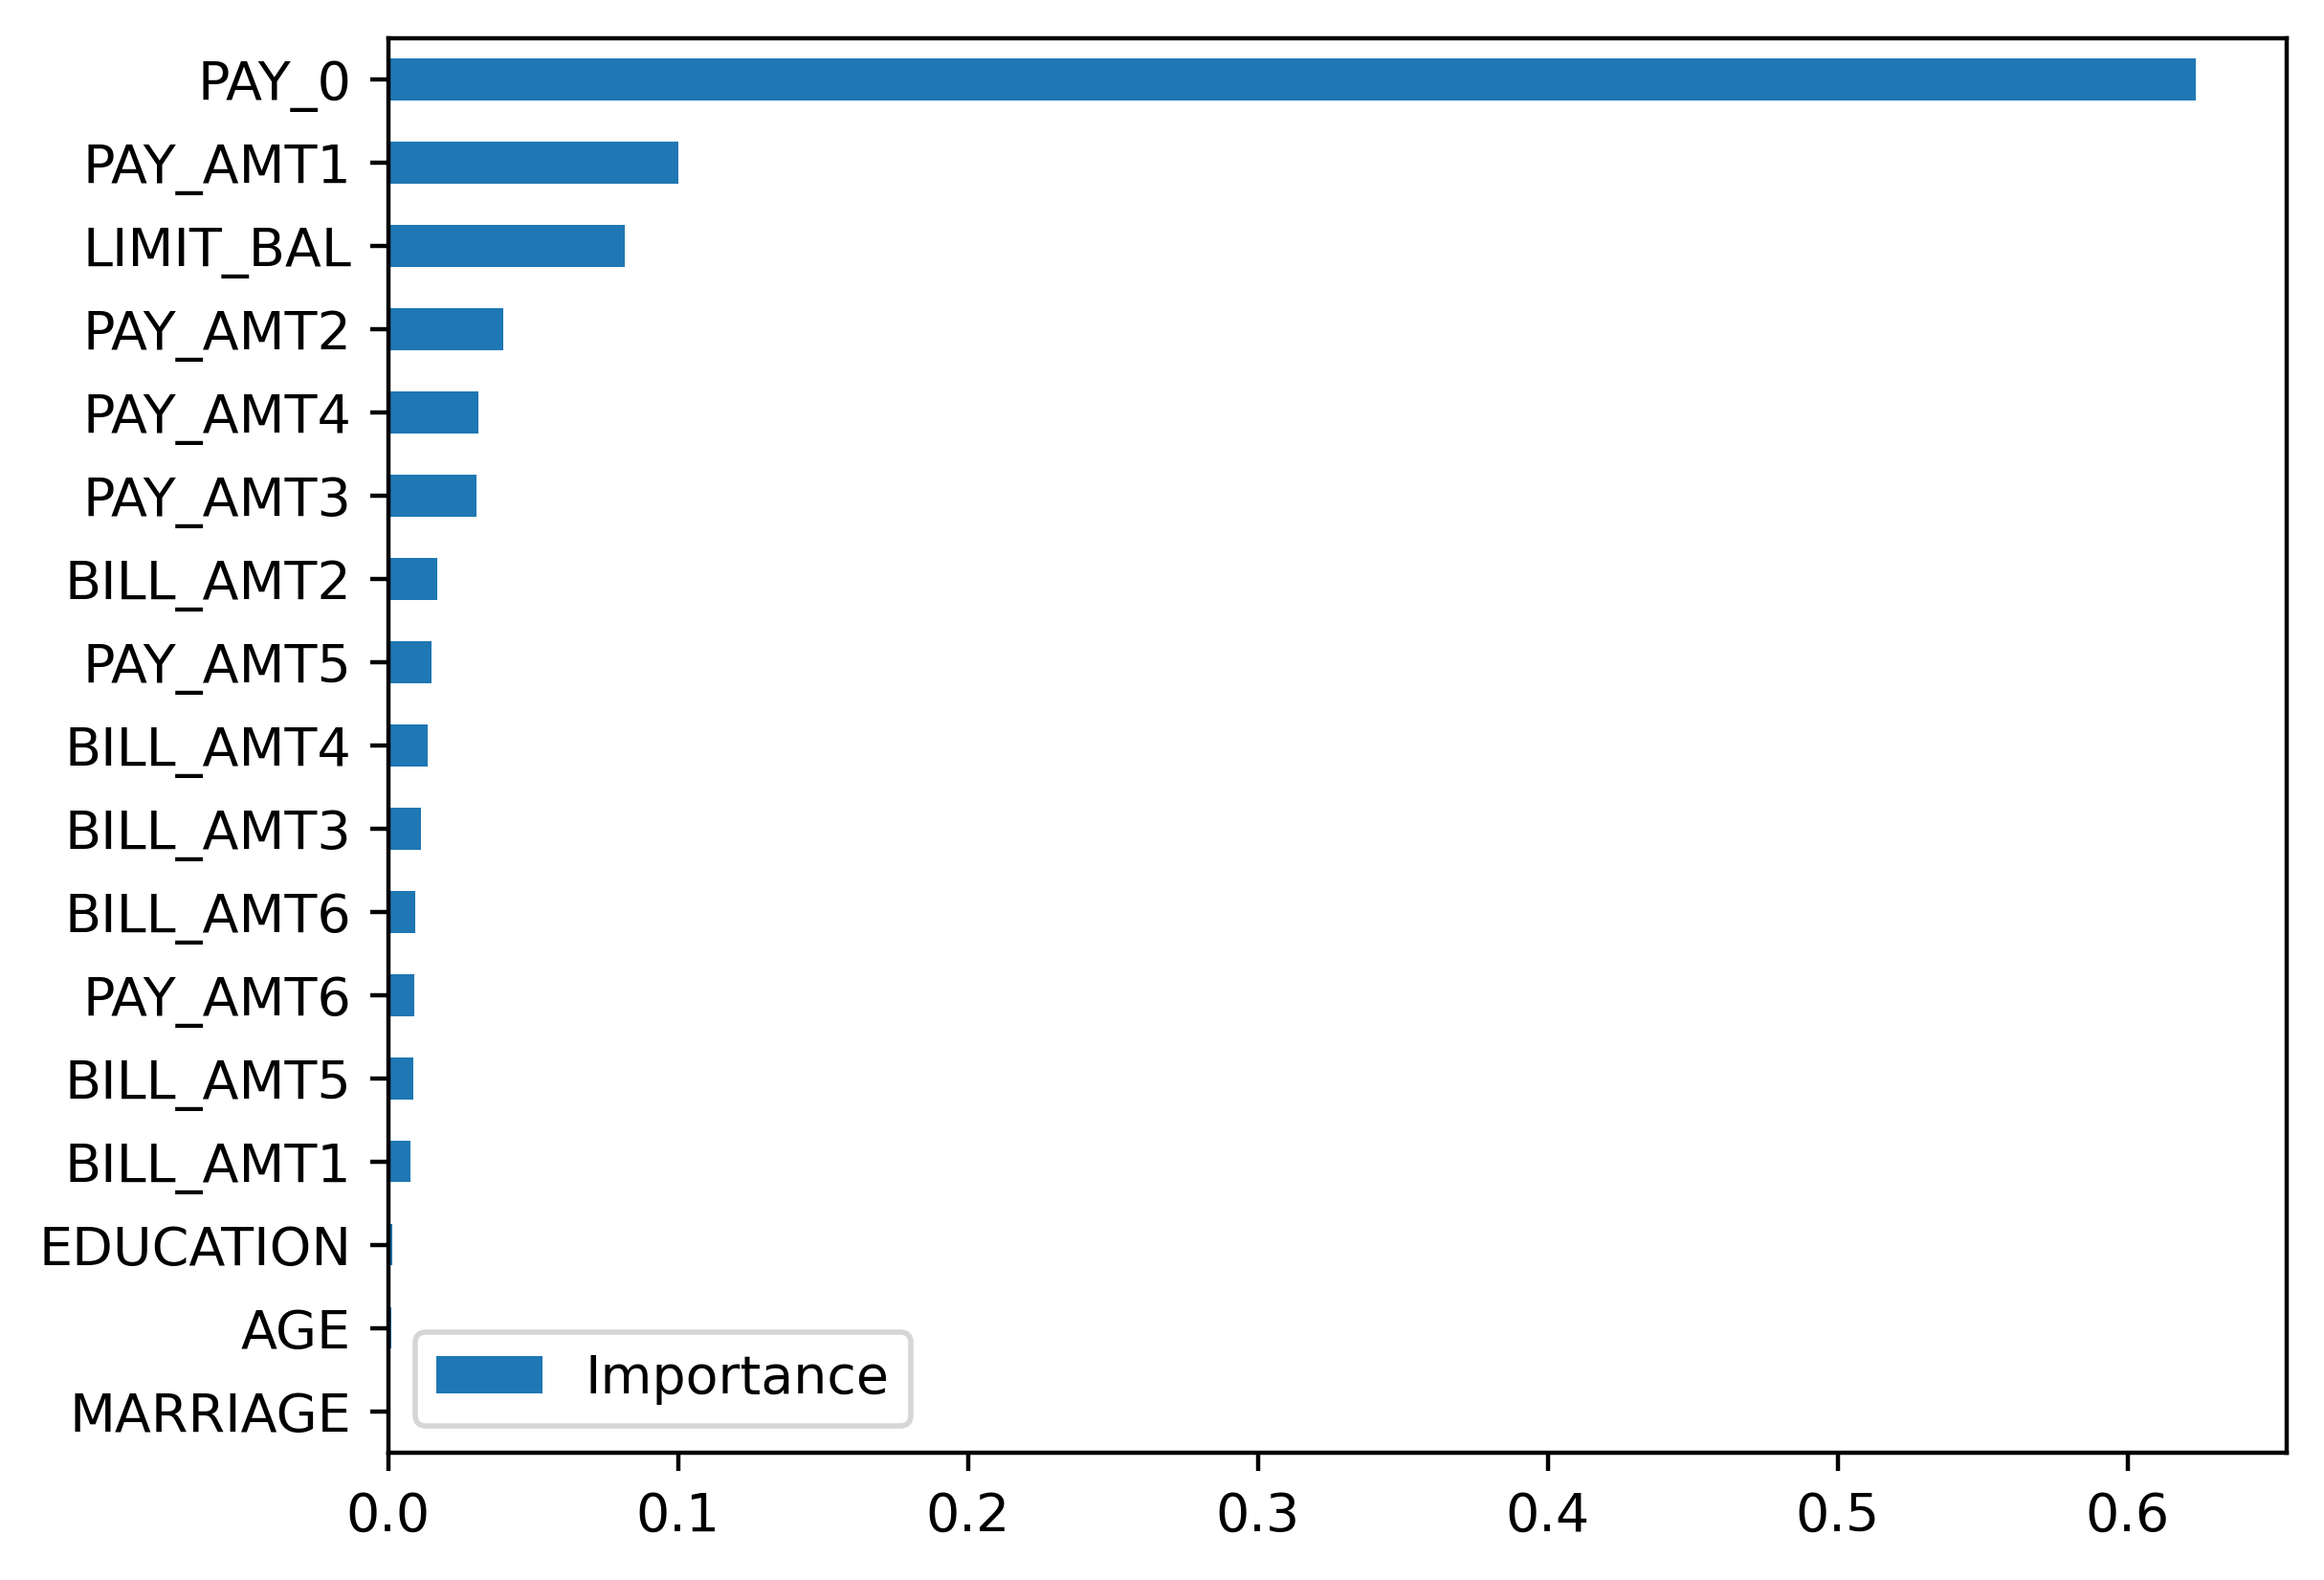

In [81]:
# {'n_estimators': 50} 
cv_rf_ex.best_params_ 
# the feature names and importances 
feat_imp_df = pd.DataFrame({ 
'Importance':cv_rf_ex.best_estimator_.feature_importances_}, 
index=features_response[:-1]) 
feat_imp_df.sort_values('Importance', ascending=True).plot.barh()

# CÂU 9

Điều chỉnh siêu tham số (hyperparameter tuning) cho cây quyết định hoặc Random Forest chưa? Hãy mô tả cách bạn sử dụng GridSearchCV hoặc RandomizedSearchCV 

## a. Điều chỉnh tham số cho Decision Tree

### Thực hiện lại bước 1, 2 và 3 để tải thư viện, nạp thư viện và chuẩn bị dữ liệu

### 4. Xây dựng mô hình Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree
# Khởi tạo mô hình
dt = tree.DecisionTreeClassifier()
# Xác định lưới tham số
params = {'max_depth': [1, 2, 4, 6, 8, 10, 12]}
# GridSearchCV với ROC AUC, 4-fold CV
cv = GridSearchCV(dt, param_grid=params, 
scoring='roc_auc', refit=True, cv=4,
verbose=1, return_train_score=True)
# Huấn luyện
cv.fit(X_train, y_train)


Fitting 4 folds for each of 7 candidates, totalling 28 fits


,estimator,DecisionTreeClassifier()
,param_grid,"{'max_depth': [1, 2, ...]}"
,scoring,'roc_auc'
,n_jobs,None
,refit,True
,cv,4
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,criterion,'gini'


#### Vẽ biểu đồ đánh giá mô hình với các tham số chiều sâu của cây khác nhau

<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_3460/1691078958.py:8: SyntaxWarning: invalid escape sequence '\p'
  label='Mean $\pm$ 1 SE Sraining scores')
/tmp/ipykernel_3460/1691078958.py:12: SyntaxWarning: invalid escape sequence '\p'
  label='Mean $\pm$ 1 SE Testing Scores')


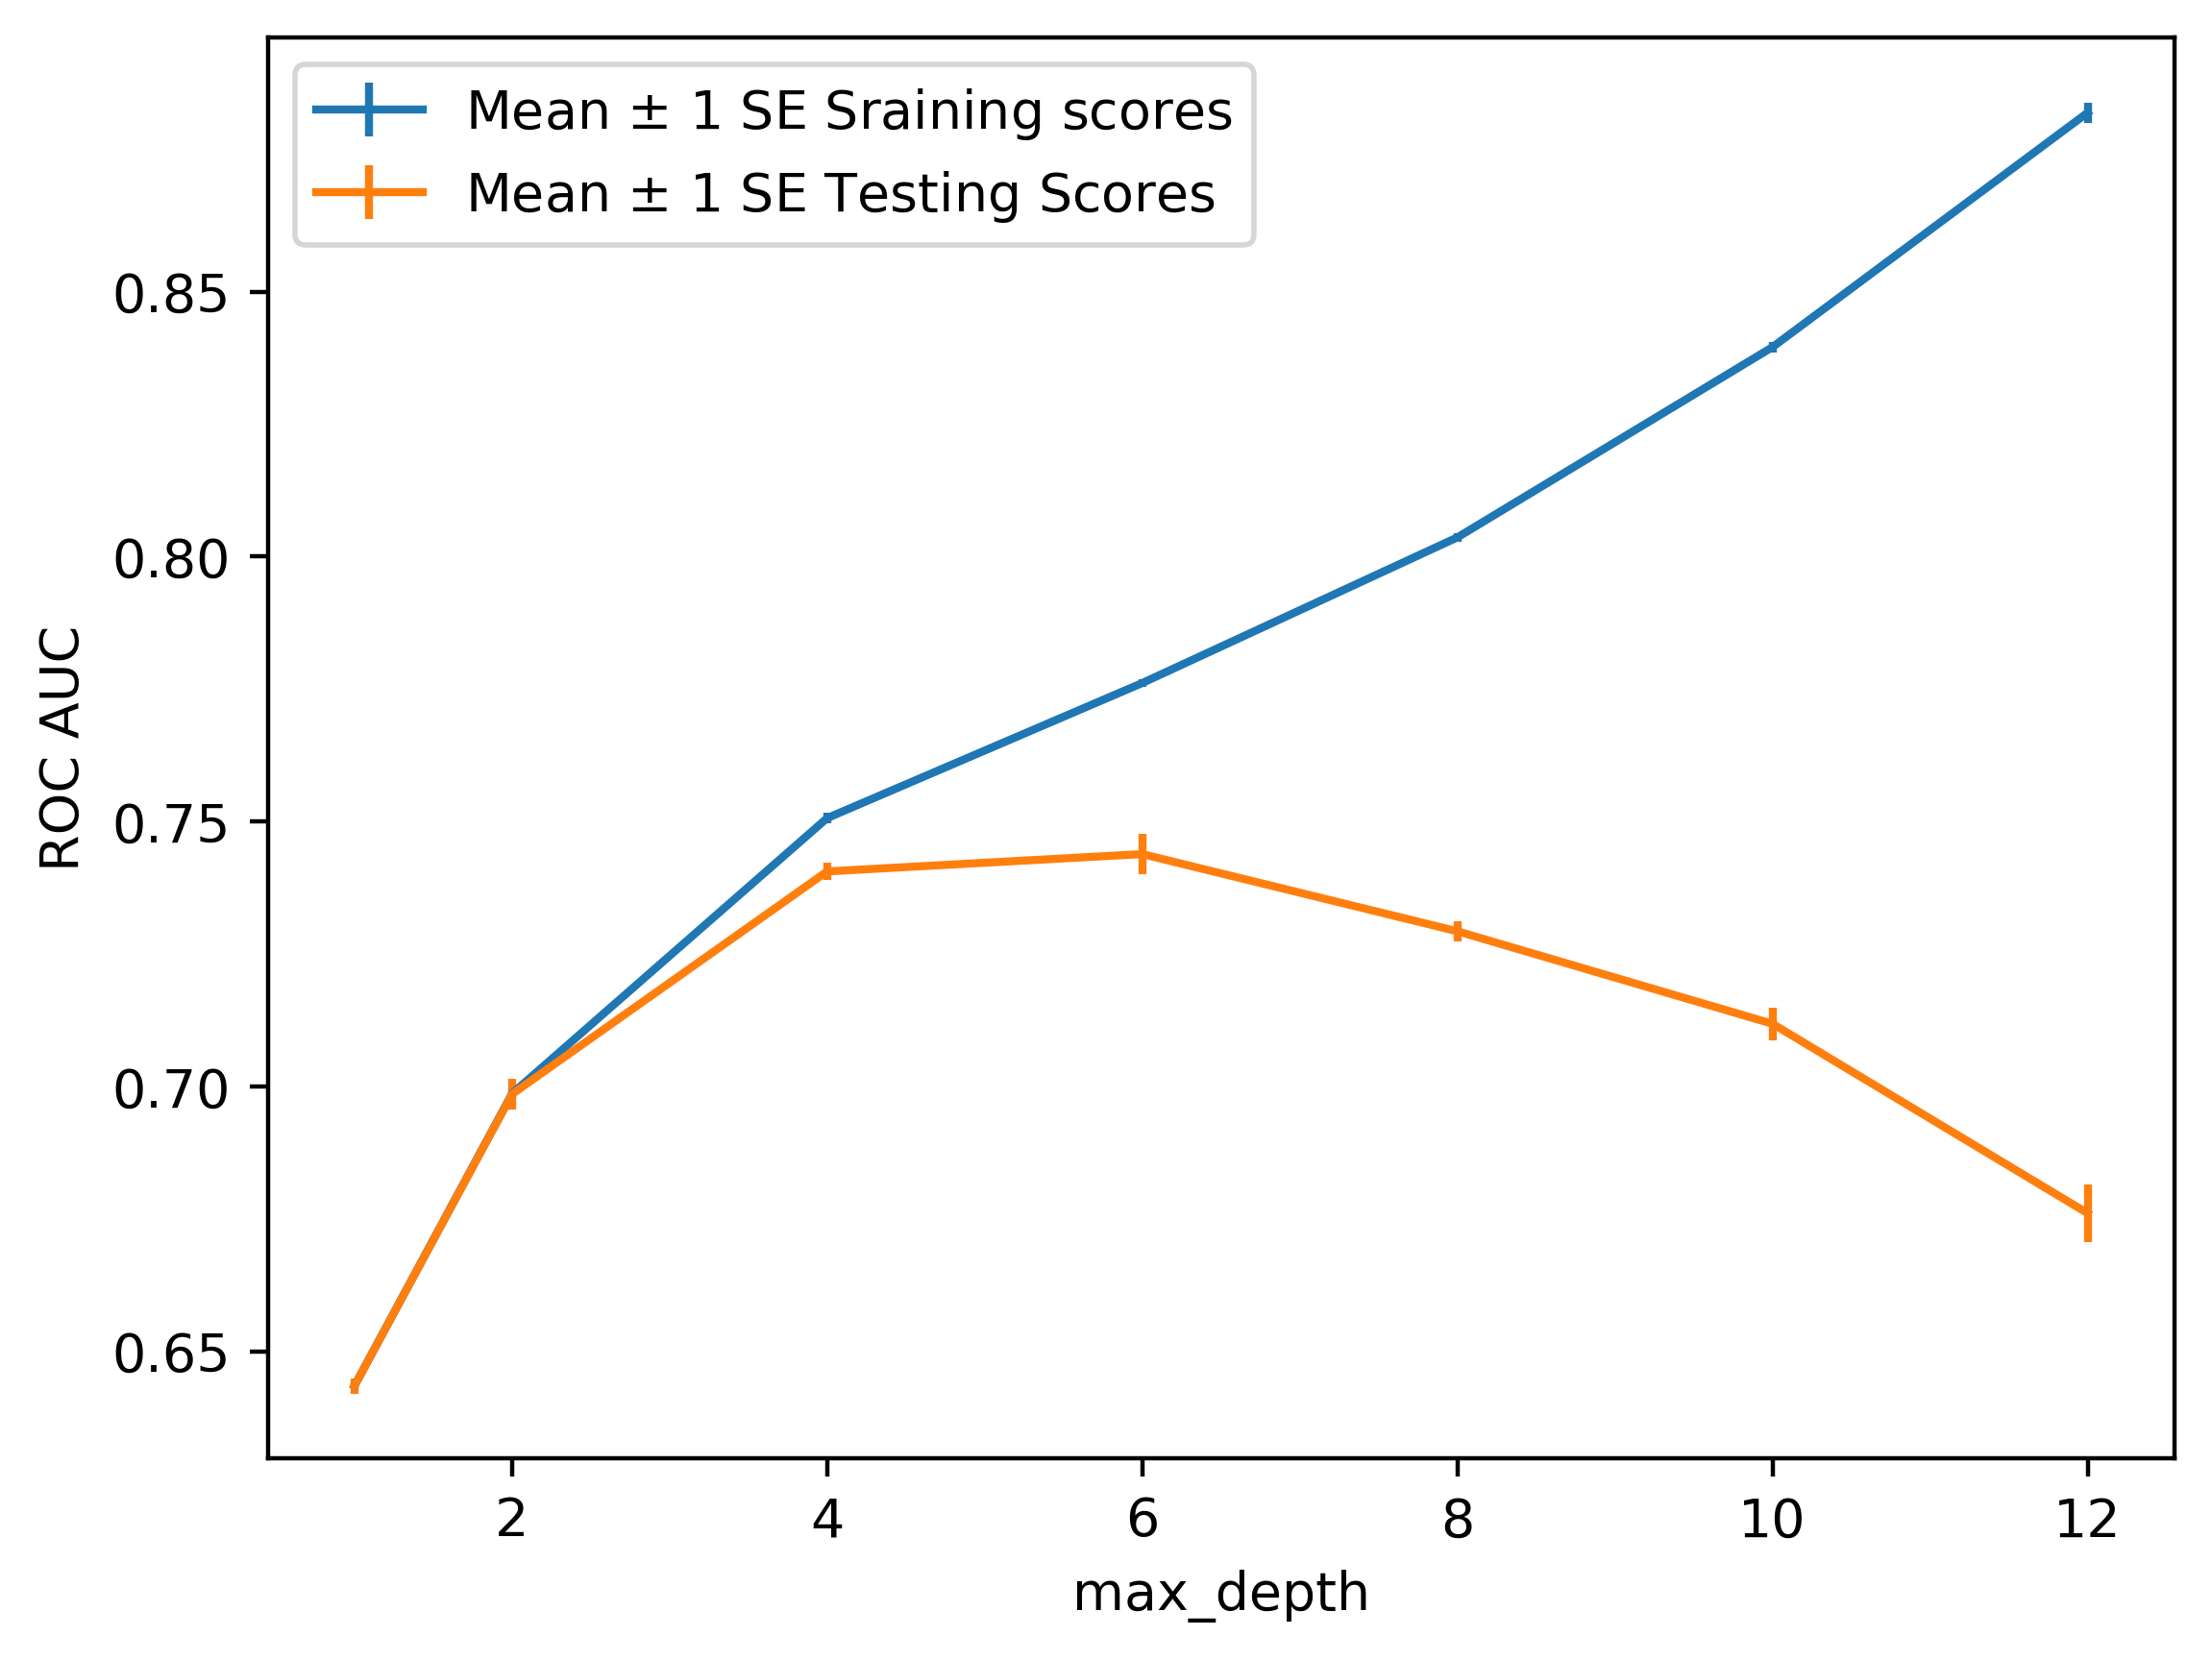

In [ ]:
cv_results_df = pd.DataFrame(cv.cv_results_)
cv_results_df.columns 
ax = plt.axes()
ax.errorbar(cv_results_df['param_max_depth'], 
            cv_results_df['mean_train_score'], 
            yerr=cv_results_df['std_train_score']/np.sqrt(4), 
            label='Mean $\pm$ 1 SE Sraining scores') 
ax.errorbar(cv_results_df['param_max_depth'], 
            cv_results_df['mean_test_score'], 
            yerr=cv_results_df['std_test_score']/np.sqrt(4), 
            label='Mean $\pm$ 1 SE Testing Scores') 
ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')
plt.show()


## b. Điều chỉnh tham số cho Random Forest

Fitting 4 folds for each of 10 candidates, totalling 40 fits


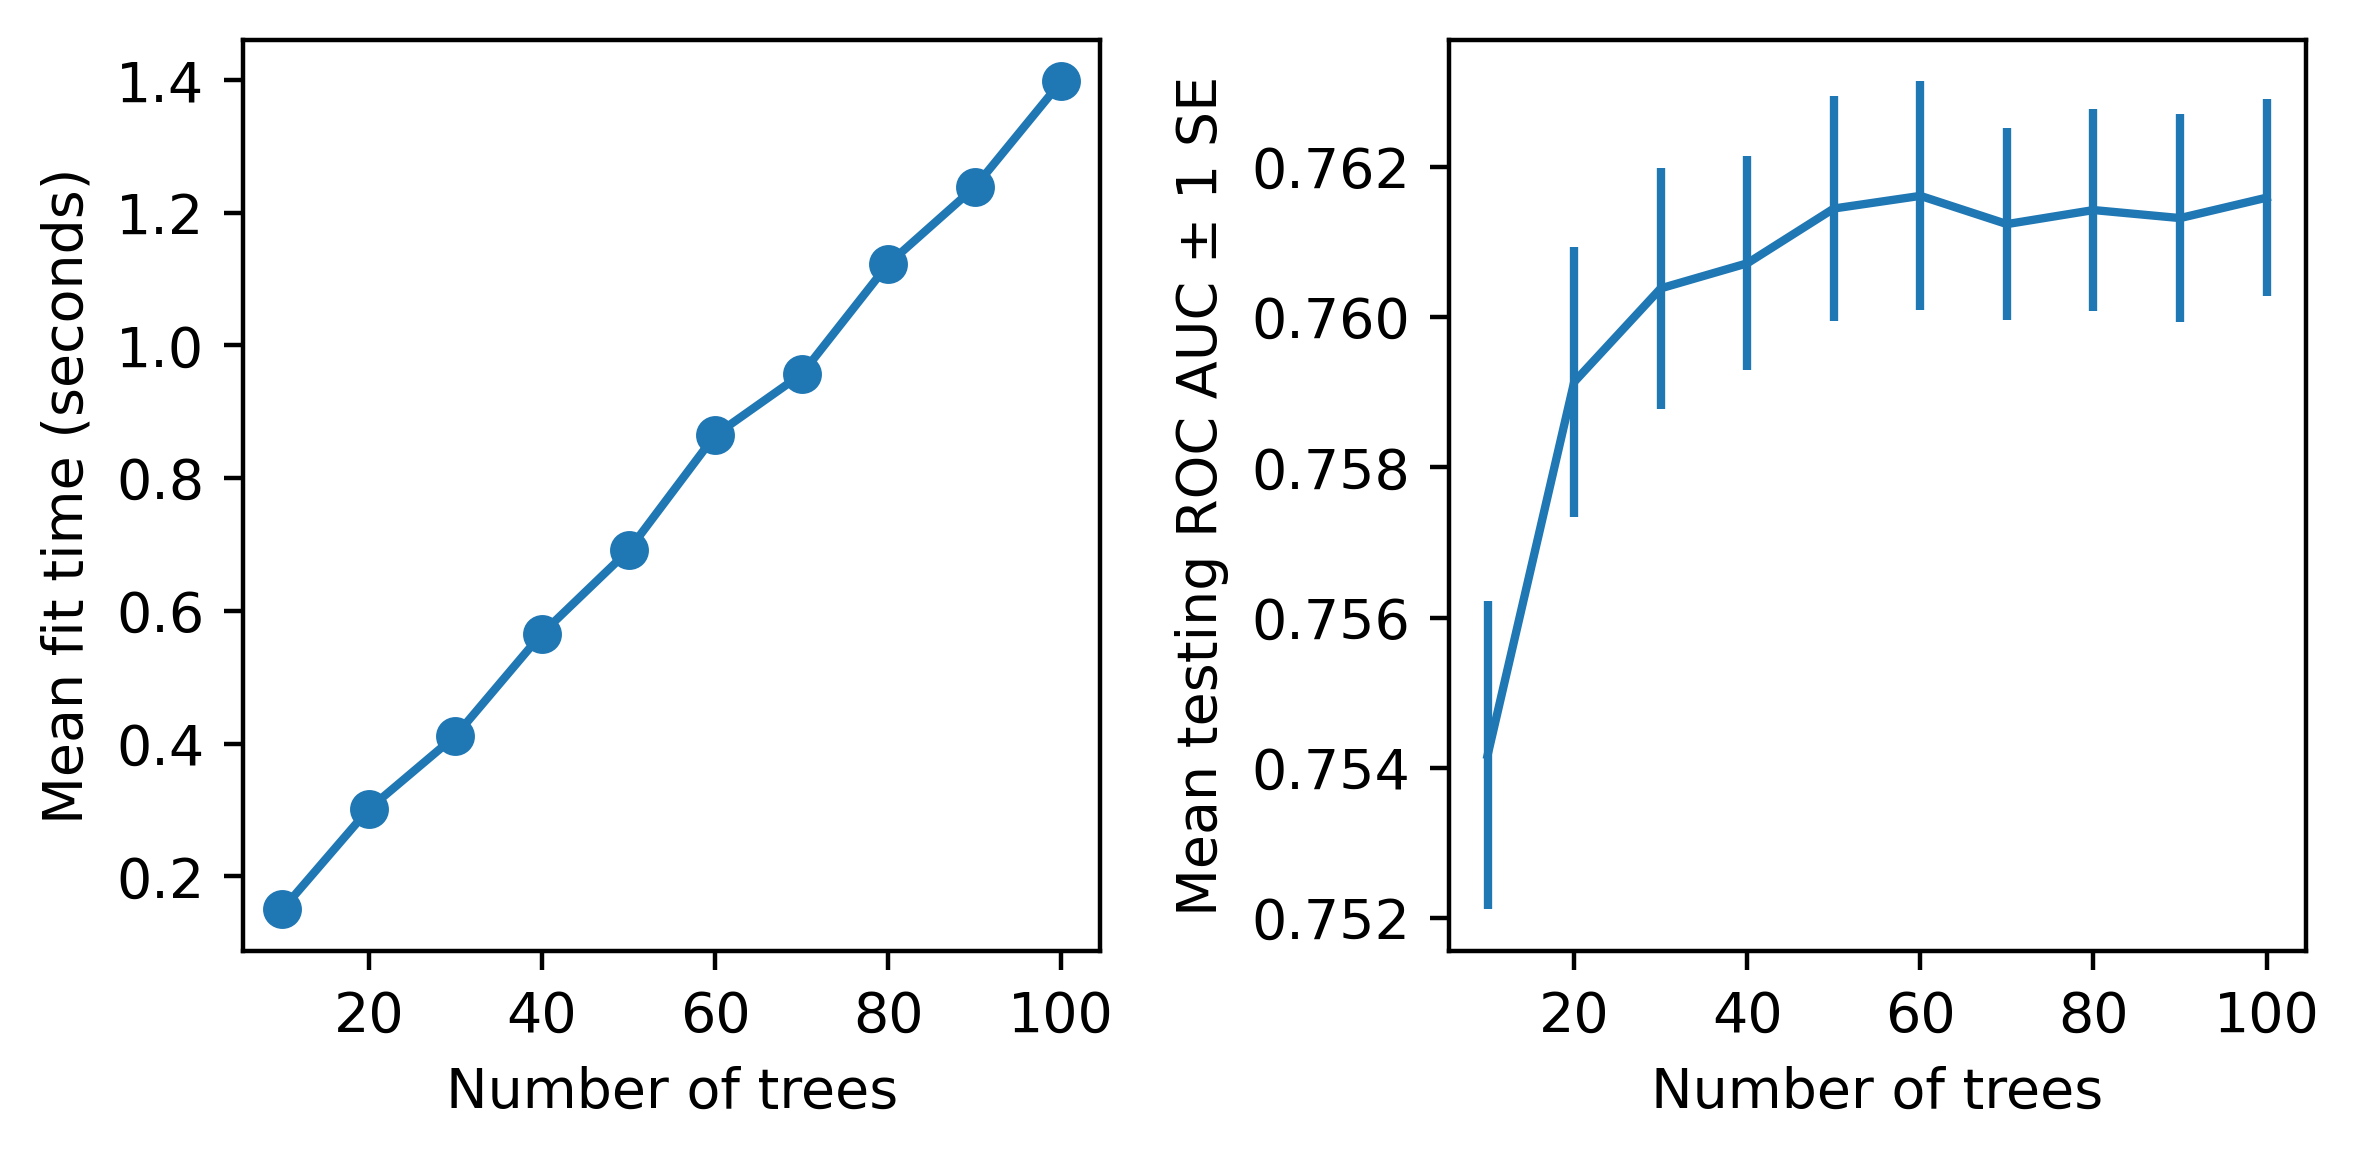

In [64]:
# Khởi tạo mô hình
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier\
      (n_estimators=10, criterion='gini', max_depth=3, min_samples_split=2,
      min_samples_leaf=1, min_weight_fraction_leaf=0.0,
      max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0,
      bootstrap=True, oob_score=False, n_jobs=None,
      random_state=4, verbose=0, warm_start=False, class_weight=None) 
# Xác định lưới tham số
rf_params_ex = {'n_estimators': list(range(10, 110, 10))}

# GridSearchCV để tìm tham số tối ưu (sử dụng ROC AUC, 4-fold CV)
cv_rf_ex = GridSearchCV(rf, param_grid=rf_params_ex,
                                          	scoring='roc_auc', n_jobs=None,
                                          	refit=True, cv=4, verbose=1,
                                          	error_score=np.nan,
                                          	return_train_score=True) 
# Fit trên tập huấn luyện
cv_rf_ex.fit(X_train, y_train)
# Lấy kết quả GridSearch và vẽ biểu đồ
cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_)
# Biểu đồ Mean Fit Time vs Number of Trees
fig, axs = plt.subplots(1, 2, figsize=(6, 3))
axs[0].plot(cv_rf_ex_results_df['param_n_estimators'],
            cv_rf_ex_results_df['mean_fit_time'], '-o')
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')
# Biểu đồ ROC AUC (Mean test score) ± 1 SE vs Number of Trees
axs[1].errorbar(cv_rf_ex_results_df['param_n_estimators'],
                cv_rf_ex_results_df['mean_test_score'],
                yerr=cv_rf_ex_results_df['std_test_score']/np.sqrt(4))
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC ± 1 SE')
plt.tight_layout()
plt.show()
